# 여기에 참조되는 모든 내용은 케라스 창시자에 배우는 딥러닝 이라는 길벗출판사 번역본을 인용하여 작성한 내용입니다. (5장 컴퓨터 비전을 위한 딥러닝)

# 데이터 내려받기

여기서 사용한 데이터셋은 https://github.com/NVlabs/ffhq-dataset, https://www.kaggle.com/abhikjha/utk-face-cropped/version/1# 에서 다운로드 받아 이용하였습니다. 

이 사진들은 중간 정도의 해상도를 가진 컬러 JPEG 파일입니다. 다음이 몇 개 샘플입니다:

![1533072-gp.jpg](attachment:1533072-gp.jpg)![10_0_0_20161220222308131.jpg.chip.jpg](attachment:10_0_0_20161220222308131.jpg.chip.jpg)
![100_1_2_20170105174847679.jpg.chip.jpg](attachment:100_1_2_20170105174847679.jpg.chip.jpg)![100_1_0_20170119212053665.jpg.chip.jpg](attachment:100_1_0_20170119212053665.jpg.chip.jpg)![103_0_2_20170112213001988.jpg.chip.jpg](attachment:103_0_2_20170112213001988.jpg.chip.jpg)

이 데이터셋은 60000개의 남자와 여자 이미지(클래스마다 30,000개)를 담고 있고 (압축해서) 543MB 크기입니다. 다운로드하고 압축을 해제한 후 세 개의 서브셋이 들어 있는 새로운 데이터셋을 만들 것입니다. 클래스마다 1,000개의 샘플로 이루어진 훈련 세트, 클래스 2500개의 샘플로 이루어진 검증 세트, 클래스마다 500개의 샘플로 이루어진 테스트 세트입니다.

다음은 이를 처리하는 코드입니다:

In [1]:
%pwd

'/content'

In [0]:
import os, shutil 

In [3]:
# original_dataset_dir = './datasets/male_and_female/'
base_dir = 'D:\\Machine_Learning\datasets/male_and_female'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

FileNotFoundError: ignored

In [0]:
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [0]:
train_male_dir = os.path.join(train_dir,'male')
if not os.path.exists(train_male_dir):
    os.mkdir(train_male_dir)

In [0]:
train_female_dir = os.path.join(train_dir,'female')
if not os.path.exists(train_female_dir):
    os.mkdir(train_female_dir)

In [0]:
validation_male_dir = os.path.join(validation_dir, 'male')
if not os.path.exists(validation_male_dir):
    os.mkdir(validation_male_dir)
validation_female_dir = os.path.join(validation_dir,'female')
if not os.path.exists(validation_female_dir):
    os.mkdir(validation_female_dir)

In [0]:
test_male_dir = os.path.join(test_dir, 'male')
if not os.path.exists(test_male_dir):
    os.mkdir(test_male_dir)
test_female_dir = os.path.join(test_dir, 'female')
if not os.path.exists(test_female_dir):
    os.mkdir(test_female_dir)

In [0]:
# # 다음 1000여개 male 이미지를 validation_male_dir에 복사합니다
# fnames = ['male.{}.png'.format(i) for i in range(00002, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_male_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 female male 이미지를 test_male_dir에 복사합니다
# fnames = ['male.{}.png'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_male_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 처음 2435개의 강아지 이미지를 train_female_dir에 복사합니다
# fnames = ['female.{}.png'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_female_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 2435개 강아지 이미지를 validation_female_dir에 복사합니다
# fnames = ['female.{}.png'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_female_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 2432개 강아지 이미지를 test_female_dir에 복사합니다
# fnames = ['female.{}.png'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_female_dir, fname)
#     shutil.copyfile(src, dst)

## 네트워크 구성하기

Conv2D(relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 컨브넷을 만들겠습니다.

BatchNormalization 은 과적합(overfitting)을 줄이기 위해 사용하였습니다.

이전보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 만들겠습니다. Conv2D + MaxPooling2D 단계를 하나 더 추가합니다. 이렇게 하면 네트워크의 용량을 늘리고 Flatten 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄일 수 있습니다. 150 × 150 크기(임의로 선택한 것입니다)의 입력으로 시작해서 Flatten 층 이전에 7 × 7 크기의 특성 맵으로 줄어듭니다.

특성 맵의 깊이는 네트워크에서 점진적으로 증가하지만(32에서 128까지), 특성 맵의 크기는 감소합니다(150 × 150에서 7 × 7까지). 이는 거의 모든 컨브넷에서 볼 수 있는 전형적인 패턴입니다.

이진 분류 문제이므로 네트워크는 하나의 유닛(크기가 1인 Dense 층)과 sigmoid 활성화 함수로 끝납니다. 이 유닛은 한 클래스에 대한 확률을 인코딩할 것입니다.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu',
                        input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization()) # 과적합을 줄이기 위해 사용하였습니다. 책의 코드에는 없는 내용입니다. 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation ='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation ='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation ='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


층들을 거치면서 특성 맵의 차원이 어떻게 변하는지 살펴보겠습니다:

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)      

컴파일 단계에서 이전과 같이 RMSprop 옵티마이저를 선택하겠습니다. 네트워크의 마지막이 하나의 시그모이드 유닛이기 때문에 이진 크로스엔트로피(binary crossentropy)를 손실로 사용합니다

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## 데이터 전처리

데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다. 지금은 데이터가 .jpeg 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따릅니다.

    - 1. 사진 파일을 읽습니다.
    - 2. jpeg 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
    - 3.그다음 부동 소수 타입의 텐서로 변환합니다.
    - 4.픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).
    
좀 복잡하게 보일 수 있지만 다행히 케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있습니다. 케라스는 `keras.preprocessing.image`에 이미지 처리를 위한 헬퍼 도구들을 가지고 있습니다. 특히 `ImageDataGenerator` 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 줍니다. 이 클래스를 사용해 보겠습니다.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

Found 28387 images belonging to 2 classes.
Found 2435 images belonging to 2 classes.


이 제너레이터의 출력 하나를 살펴보죠. 이 출력은 150 × 150 RGB 이미지의 배치(`(20, 150, 150, 3)` 크기)와 이진 레이블의 배치(`(20,)` 크기)입니다. 각 배치에는 20개의 샘플(배치 크기)이 있습니다. 제너레이터는 이 배치를 무한정 만들어 냅니다. 타깃 폴더에 있는 이미지를 끝없이 반복합니다. 따라서 반복 루프안의 어디에선가 `break` 문을 사용해야 합니다.

In [0]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (32, 150, 150, 3)
배치 레이블 크기: (32,)


제너레이터를 사용한 데이터에 모델을 훈련시켜 보겠습니다. `fit_generator` 메서드는 `fit` 메서드와 동일하되 데이터 제너레이터를 사용할 수 있습니다. 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대합니다. 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 합니다. `steps_per_epoch` 매개변수에서 이를 설정합니다. 제너레이터로부터 `steps_per_epoch` 개의 배치만큼 뽑은 다음, 즉 `steps_per_epoch` 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어갑니다. 여기서는 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것입니다.

`fit_generator`를 사용할 때 `fit` 메서드와 마찬가지로 `validation_data` 매개변수를 전달할 수 있습니다. 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능합니다. `validation_data`로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환합니다. 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 `validation_steps` 매개변수에 지정해야 합니다.

In [0]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=300,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
300/300 [==============================] - 57s 191ms/step - loss: 0.4768 - acc: 0.7915 - val_loss: 0.4937 - val_acc: 0.5962
Epoch 2/30
300/300 [==============================] - 53s 178ms/step - loss: 0.3603 - acc: 0.8501 - val_loss: 0.2849 - val_acc: 0.8549
Epoch 3/30
300/300 [==============================] - 53s 177ms/step - loss: 0.3352 - acc: 0.8614 - val_loss: 0.1544 - val_acc: 0.9069
Epoch 4/30
300/300 [==============================] - 54s 179ms/step - loss: 0.2507 - acc: 0.8986 - val_loss: 0.3198 - val_acc: 0.9141
Epoch 5/30
300/300 [==============================] - 53s 177ms/step - loss: 0.2621 - acc: 0.8931 - val_loss: 0.1326 - val_acc: 0.9255
Epoch 6/30
300/300 [==============================] - 53s 176ms/step - loss: 0.2568 - acc: 0.8962 - val_loss: 0.1894 - val_acc: 0.9413
Epoch 7/30
300/300 [==============================] - 53s 177ms/step - loss: 0.2025 - acc: 0.9191 - val_loss: 0.0711 - val_acc: 0.9433
Epoch 8/30
300/300 [==============================] - 5

In [0]:
model.save('male_and_female_1.h5')

In [0]:
import matplotlib.pyplot as plt

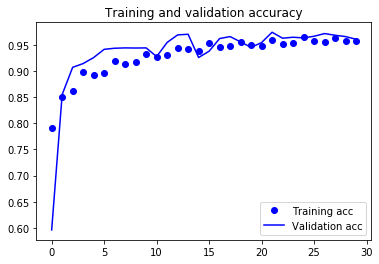

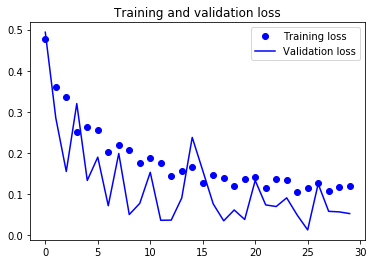

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 컨브넷의 학습 시각화하기


딥러닝 모델을 '블랙 박스' 같다고 자주 이야기합니다. 학습된 표현에서 사람이 이해하기 쉬운 형태를 뽑아내거나 제시하기 어렵기 때문입니다. 일부 딥러닝 모델에서는 이 말이 어느정도 맞지만 컨브넷에서는 전혀 아닙니다. 컨브넷의 표현은 시각적인 개념을 학습한 것이기 때문에 시각화하기 아주 좋습니다. 2013년부터 이런 표현들을 시각화하고 해석하는 다양한 기법들이 개발되었습니다. 여기서 모두를 다룰 수는 없지만 가장 사용이 편하고 유용한 세 가지 기법을 다루겠습니다.

* 컨브넷 중간 층의 출력(중간 층에 있는 활성화)을 시각화하기 : 연속된 컨브넷층이 입력을 어떻게 변형시키는지 이해하고 개별적인 컨브넷 필터의 의미를 파악하는 데 도움이 됩니다.
* 컨브넷 필터를 시각화하기 : 컨브넷의 필터가 찾으려는 시각적인 패턴과 개념이 무엇인지 상세하게 이해하는 데 도움이 됩니다.
* 클래스 활성화에 대한 히트맵을 이미지에 시각화하기 : 이미지의 어느 부분이 주어진 클래스에 속하는 데 기여했는지 이해하고 이미지에서 객체의 위치를 추정하는 데 도움이 됩니다.

첫 번째 방법인 활성화 출력을 시각화하는 기법을 위해서  남자 여자 분류 문제에서 처음부터 훈련시킨 컨브넷을 사용하겠습니다. 다른 두 가지 방법을 위해서는 VGG16 모델을 사용하겠습니다.

In [0]:
from keras.models import load_model

model = load_model('male_and_female_1.h5')
model.summary()  # 기억을 되살리기 위해서 모델 구조를 출력합니다

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)      

## 요약

- 컨브넷은 시각적인 분류 문제를 다루는 최상의 도구이다.
- 컨브넷은 우리가 보는 세상을 표현하기 위한 패턴의 계층구조와 개념을 학습한다.
- 학습된 표현은 쉽게 분석이 가능하다. 컨브넷응 블랙박스가 아니다.
- 과대적합을 줄이기 위해 데이터를 증식하기도 해야 한다. (우리는 하지 않았다)